In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [11]:
train_data = pd.read_csv('../../data/house_price/cleaning/train_fixx.csv')
train_data.describe()

,LotShape,LotConfig,Neighborhood,HouseStyle,YearRemodAdd,BsmtFinType1,HeatingQC,FullBath,HalfBath,GarageType,GarageFinish,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.942466,3.019178,12.251370,3.038356,1984.865753,2.789726,1.538356,1.565068,0.382877,2.208219,1.228767,6.321918,2007.815753,180921.195890
std,1.409156,1.622634,6.013735,1.911305,20.645407,1.837550,1.739524,0.550916,0.502885,1.759864,0.811835,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,2.000000,7.000000,2.000000,1967.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.000000,2007.000000,129975.000000
50%,3.000000,4.000000,12.000000,2.000000,1994.000000,2.000000,0.000000,2.000000,0.000000,1.000000,1.000000,6.000000,2008.000000,163000.000000
75%,3.000000,4.000000,17.000000,5.000000,2004.000000,5.000000,4.000000,2.000000,1.000000,5.000000,2.000000,8.000000,2009.000000,214000.000000
max,3.000000,4.000000,24.000000,7.000000,2010.000000,5.000000,4.000000,3.000000,2.000000,5.000000,2.000000,12.000000,2010.000000,755000.000000


In [12]:
#pisah x dan y
x = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [13]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
#inisialisasi model
model = LinearRegression()

#latih model
model.fit(X_train, y_train)

#execute prediksi
y_pred = model.predict(x_test)



In [16]:
#evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred.round())

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"Accuracy: {accuracy}")


MSE: 3404690740.5187225
RMSE: 58349.72785299622
MAE: 37841.65354461622
R2: 0.5561217804102628
Accuracy: 0.0


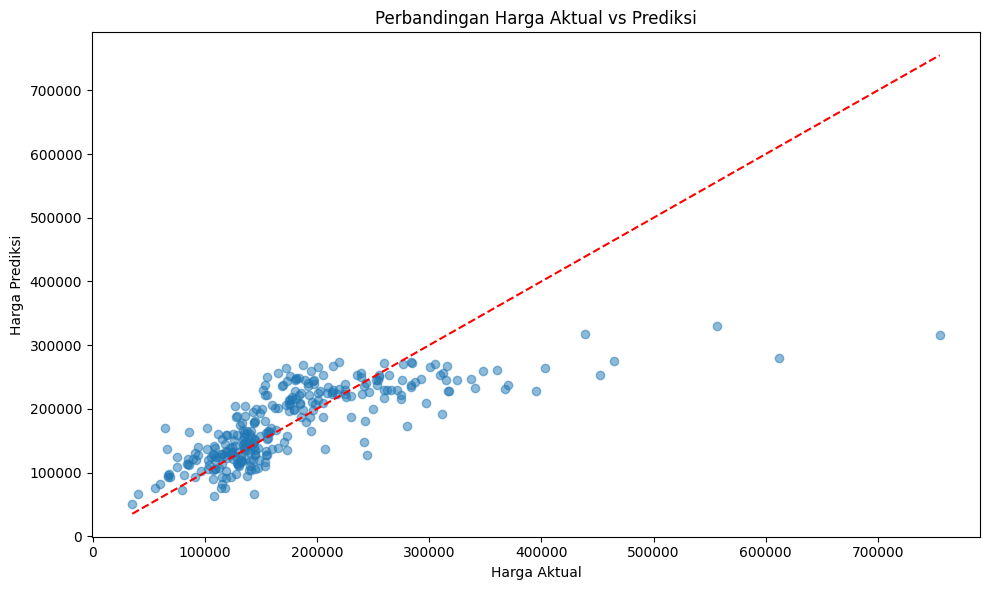

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Harga Aktual')
plt.ylabel('Harga Prediksi')
plt.title('Perbandingan Harga Aktual vs Prediksi')
plt.tight_layout()
plt.show()